## Size & Frequency of Genomic Islands

I need to calculate how the size and frequency of genomic islands changes throughout my three comparisons: within-East, within-West, and East v. West. Although this is specifically focused on genomic islands of divergence, since I have the data, I'll be looking at regions with significant evidence of balancing selection as well. 


The full sequence of steps:

1. Conduct sliding window analyses on per locus Fst values 
   - [Sliding Window Analysis Final](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/Sliding%20Window%20Analysis%20Final.ipynb) and [Marker Number in Sliding Window Analysis](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/Marker%20Number%20in%20Sliding%20Window%20Analysis.ipynb) for filtering
2. Identify regions with significantly high (or low) Fst - with significance defined by 95% confidence interval
  - [Marker Function in Sliding Window Analysis](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/Marker%20Function%20in%20Sliding%20Window%20Analysis.ipynb)
3. Count the number of genomic islands on each linkage group
4. Find the width of each genomic island and take an average

<br>

**Frequency** was defined as (1) the average number of genomic islands on each linkage group, and (2) the total number of genomic islands across all linkage groups

**Size** or **Width** was calculated using the base-pair position of the sliding window at the beginning of the region, and the base-pair position of the sliding window at the end of the region. 

<br>

### Counting the number of genomic islands on each linkage group

This was very low tech - I used a combination of the [plots](https://github.com/mfisher5/PCod-Compare-repo/tree/master/analyses/SlidingWindow/plots) and the output from [Marker Function in Sliding Window Analysis](https://github.com/mfisher5/PCod-Compare-repo/blob/master/notebooks/Marker%20Function%20in%20Sliding%20Window%20Analysis.ipynb), which gave me a data frame of all windows that were above or below the 95% confidence interval. 

I kept track of the number of islands per linkage group (both divergence and balancing selection) in a text file.



#### 4/3/2018 
### Eastern population

In [1]:
cd ../analyses/SlidingWindow/

/mnt/hgfs/PCod-Compare-repo/analyses/SlidingWindow


In [2]:
!head batch_8_east_islands.txt

In [44]:
#### read in data ####
infile = open("batch_8_east_islands.txt", "r")
infile.readline()
lgs = []
n_windows = []
for line in infile:
    lgs.append(int(line.strip().split()[0]))
    n_windows.append(int(line.strip().split()[1]))
infile.close()

#### Island Counts

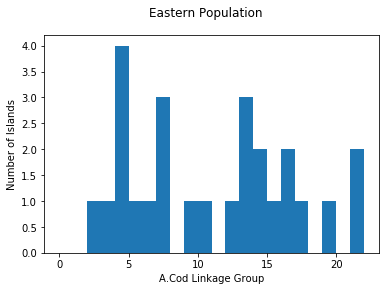

In [45]:
#### islands per linkage group ####
import matplotlib.pyplot as plt
import numpy as np
plt.hist(lgs, bins=np.arange(0,23,1))
plt.xlabel("A.Cod Linkage Group")
plt.ylabel("Number of Islands")
plt.suptitle("Eastern Population")
plt.show()

In [46]:
plt.close()

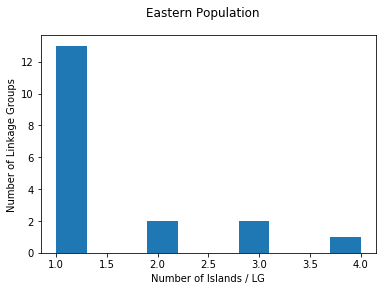

In [47]:
#### islands per linkage group histogram ####
unique_lgs = set(lgs)
island_counts = []
for lg in unique_lgs:
    island_counts.append(len([i for i in lgs if i == lg]))


plt.hist(island_counts)
plt.xlabel("Number of Islands / LG")
plt.ylabel("Number of Linkage Groups")
plt.suptitle("Eastern Population")
plt.show()

In [48]:
plt.close()

#### Total Number of islands

In [49]:
len(n_windows)

27

#### Island Width

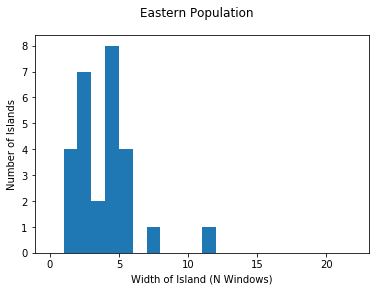

In [50]:
#### island width per linkage group ####
plt.hist(n_windows, bins=np.arange(0,23,1))
plt.xlabel("Width of Island (N Windows)")
plt.ylabel("Number of Islands")
plt.suptitle("Eastern Population")
plt.show()

In [51]:
plt.close()

#### Average number of windows per island

In [52]:
sum(n_windows)/float(len(n_windows))

3.4814814814814814

<br>
<br>
### Western Population

In [53]:
#### read in data ####
infile = open("batch_8_west_islands.txt", "r")
infile.readline()
lgs = []
n_windows = []
for line in infile:
    lgs.append(int(line.strip().split()[0]))
    n_windows.append(int(line.strip().split()[1]))
infile.close()

#### Island Counts

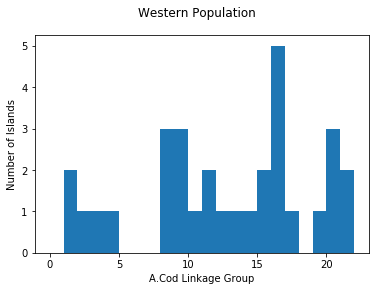

In [54]:
#### islands per linkage group ####
import matplotlib.pyplot as plt
import numpy as np
plt.hist(lgs, bins=np.arange(0,23,1))
plt.xlabel("A.Cod Linkage Group")
plt.ylabel("Number of Islands")
plt.suptitle("Western Population")
plt.show()

In [55]:
plt.close()

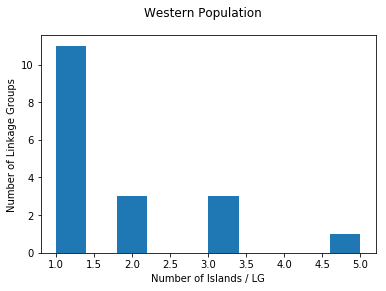

In [56]:
#### islands per linkage group histogram ####
unique_lgs = set(lgs)
island_counts = []
for lg in unique_lgs:
    island_counts.append(len([i for i in lgs if i == lg]))


plt.hist(island_counts)
plt.xlabel("Number of Islands / LG")
plt.ylabel("Number of Linkage Groups")
plt.suptitle("Western Population")
plt.show()

In [57]:
plt.close()

#### Island Width

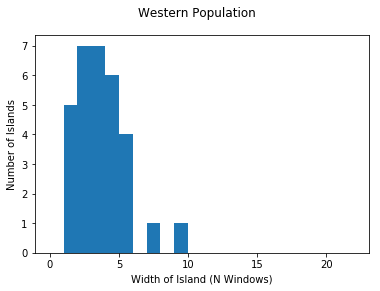

In [58]:
#### island width per linkage group ####
plt.hist(n_windows, bins=np.arange(0,23,1))
plt.xlabel("Width of Island (N Windows)")
plt.ylabel("Number of Islands")
plt.suptitle("Western Population")
plt.show()

In [59]:
plt.close()

#### Average number of windows per island

In [60]:
sum(n_windows)/float(len(n_windows))

3.225806451612903

#### Total Number of islands

In [61]:
len(n_windows)

31

<br>
<br>

#### 4/6/2018

<br>

### East & West Populations

In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [3]:
cd ../analyses/SlidingWindow

/mnt/hgfs/PCod-Compare-repo/analyses/SlidingWindow


In [7]:
#### read in data ####
infile = open("batch_8_eastwest_islands.txt", "r")
infile.readline()
lgs = []
n_windows = []
for line in infile:
    lgs.append(int(line.strip().split()[0].strip("LG")))
    n_windows.append(int(line.strip().split()[1]))
infile.close()

#### Island Counts

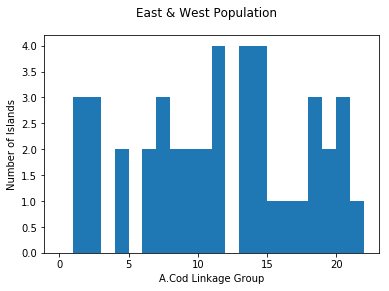

In [9]:
#### islands per linkage group ####
import matplotlib.pyplot as plt
import numpy as np
plt.hist(lgs, bins=np.arange(0,23,1))
plt.xlabel("A.Cod Linkage Group")
plt.ylabel("Number of Islands")
plt.suptitle("East & West Population")
plt.show()

In [10]:
plt.close()

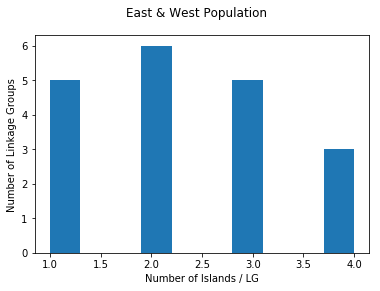

In [12]:
#### islands per linkage group histogram ####
unique_lgs = set(lgs)
island_counts = []
for lg in unique_lgs:
    island_counts.append(len([i for i in lgs if i == lg]))


plt.hist(island_counts)
plt.xlabel("Number of Islands / LG")
plt.ylabel("Number of Linkage Groups")
plt.suptitle("East & West Population")
plt.show()

In [13]:
plt.close()

#### Island Width

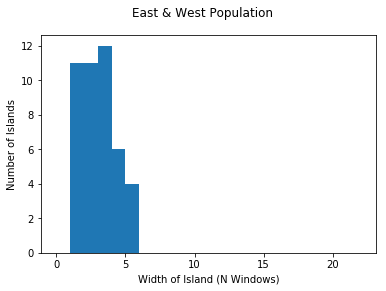

In [14]:
#### island width per linkage group ####
plt.hist(n_windows, bins=np.arange(0,23,1))
plt.xlabel("Width of Island (N Windows)")
plt.ylabel("Number of Islands")
plt.suptitle("East & West Population")
plt.show()

In [15]:
plt.close()

#### Average number of windows per island

In [16]:
sum(n_windows)/float(len(n_windows))

2.5681818181818183

#### Total Number of islands

In [17]:
len(n_windows)

44